In [9]:
import tensorflow as tf
import tflearn
import tqdm

In [10]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm

TRAIN_DIR = 'D:/Udacity/dogs-vs-cats-redux-kernels-edition/train'
TEST_DIR = 'D:/Udacity/dogs-vs-cats-redux-kernels-edition/test'
IMG_SIZE = 50
LR = 1e-5

MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, '10conv-basic')

In [11]:
def label_img(img):
    word_label = img.split('.')[-3]
    if word_label == 'cat': return [1, 0]
    elif word_label == 'dog': return [0, 1] 
print("Running good")

Running good


In [12]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
                label = label_img(img)
                path = os.path.join(TRAIN_DIR, img)
                img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE, IMG_SIZE))
                training_data.append([np.array(img), np.array(label)])
    shuffle(training_data)
    np.save('D:/Udacity/dogs-vs-cats-redux-kernels-edition/train_data.npy', training_data)
    return training_data   

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure()

for num, data in enumerate(train_data[:20]):
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(5, 4, num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
    
    y.imshow(orig, cmap='gray')
    #plt.title(str_label)
    #y.axes.get_xaxis().set_visible(False)
    #y.axes.get_yaxis().set_visible(False)
plt.show()

NameError: name 'train_data' is not defined

<Figure size 432x288 with 0 Axes>

In [14]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR, img)
        img_num = img.split('.')[0]
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE, IMG_SIZE))
        testing_data.append([np.array(img), img_num])
    np.save('D:/Udacity/dogs-vs-cats-redux-kernels-edition/test_data.npy', testing_data)
    return testing_data

In [15]:
#logs_dir = 'D:/Udacity/dogs-vs-cats-redux-kernels-edition/events_logs_new'
train_data = create_train_data()
#if already exists
#np_load_old = np.load
#np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
#train_data = np.load('D:/Udacity/dogs-vs-cats-redux-kernels-edition/train_data.npy')
#np.load = np_load_old

100%|██████████| 25000/25000 [03:36<00:00, 115.66it/s]


In [16]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import tflearn.datasets.mnist as mnist

tf.reset_default_graph()

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir = 'log')
#model = tflearn.DNN(convnet, tensorboard_verbose=3)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [17]:
if os.path.exists('{}.meta'.format('D:/Udacity/dogs-vs-cats-redux-kernels-edition/' + MODEL_NAME)):
    model.load('D:/Udacity/dogs-vs-cats-redux-kernels-edition/' + MODEL_NAME)
    print('model loaded!')

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from D:/Udacity/dogs-vs-cats-redux-kernels-edition/dogsvscats-1e-05-10conv-basic.model
model loaded!


In [18]:
train = train_data[:-500]
validation = train_data[-500:]

In [19]:
X = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y = [i[1] for i in train]

validation_X = np.array([i[0] for i in validation]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
validation_Y = [i[1] for i in validation]

In [20]:
model.fit({'input': X}, {'targets': Y}, n_epoch=7, validation_set=({'input': validation_X}, {'targets': validation_Y}), snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 8042  | total loss: 0.32863 | time: 24.976s
| Adam | epoch: 007 | loss: 0.32863 - acc: 0.8598 -- iter: 24448/24500
Training Step: 8043  | total loss: 0.31668 | time: 26.040s
| Adam | epoch: 007 | loss: 0.31668 - acc: 0.8660 | val_loss: 0.33737 - val_acc: 0.8400 -- iter: 24500/24500
--


In [21]:
model.save('D:/Udacity/dogs-vs-cats-redux-kernels-edition/' + MODEL_NAME)

INFO:tensorflow:D:/Udacity/dogs-vs-cats-redux-kernels-edition/dogsvscats-1e-05-10conv-basic.model is not in all_model_checkpoint_paths. Manually adding it.


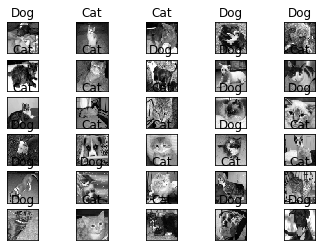

In [22]:
import matplotlib.pyplot as plt

#test_data=process_test_data()
#if already exists
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
test_data = np.load('D:/Udacity/dogs-vs-cats-redux-kernels-edition/test_data.npy')
np.load = np_load_old

fig = plt.figure()

for num, data in enumerate(test_data[:30]):
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(6, 5, num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
    
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label='Dog'
    else: str_label = 'Cat'
        
    y.imshow(orig , cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

In [90]:
with open('D:/Udacity/dogs-vs-cats-redux-kernels-edition//submission-file_4.csv', 'w') as f:
    f.write('id, label\n')

In [91]:
with open('D:/Udacity/dogs-vs-cats-redux-kernels-edition//submission-file_4.csv', 'a') as f:
    for data in tqdm(test_data):
        img_num = data[1]
        img_data = data[0]
        orig = img_data
        data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
        model_out = model.predict([data])[0]
        f.write('{}, {} \n'.format(img_num, model_out[1]))

100%|██████████| 12500/12500 [00:17<00:00, 717.47it/s]


In [30]:
DIR = 'D:/Udacity/dogs-vs-cats-redux-kernels-edition/RealWorld'
new_data = []
    
for img in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR, img)
        img_num = img.split('.')[0]
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE, IMG_SIZE))
        new_data.append([np.array(img), img_num])
    
    
#np.save('D:/Udacity/dogs-vs-cats-redux-kernels-edition/test_data.npy', testing_data)
#return testing_data

100%|██████████| 8/8 [00:00<00:00, 72.24it/s]


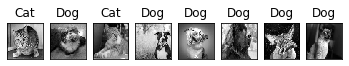

In [32]:
fig = plt.figure()
for num, data in enumerate(new_data[:8]):
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(1, 8, num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
    
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label='Dog'
    else: str_label = 'Cat'
        
    y.imshow(orig , cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()